In [124]:
import wandb
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
data = pd.read_csv("/Users/faizeyildiz/Downloads/labeled_test_set_results.csv")

In [152]:
df_prev=pd.DataFrame(data)
df=df_prev.dropna(subset=["factual_correctness"])

In [153]:
tr_data=df[df["Language"]== 'Turkish']
eng_data=df[df["Language"]== 'English']

In [154]:
tr_data.info

<bound method DataFrame.info of      Unnamed: 0                                         user_input  \
0             0                ODTÜ HAT nedir ve ne zaman kuruldu?   
1             1  ODTÜ kulübü ve faaliyetleri hakkında daha fazl...   
2             2  YKS Kayıt Programı kullanarak yurt başvurusu n...   
5             5               ARKEOLOJİ DERNEĞİ nerede toplanıyor?   
6             6            GÜZEL SANATLAR DERNEĞİ'nin amacı nedir?   
..          ...                                                ...   
126         126  Bir Üniversite BT Destek Teknisyeni olarak, sı...   
128         128   KONTEMPORARY DANS GRUBU için kulüp odası nerede?   
129         129  Yurt Bilgi Teknolojileri Destek Koordinatörü o...   
130         130  MİMARLIK BÖLÜMÜ'nün tasarım kavramlarının tanı...   
132         132  MODERN DİLLER BÖLÜMÜ'NÜN BİLİM KURGU VE FANTAS...   

                                    retrieved_contexts  \
0    Sports Club Name: ODTÜ HAVACILIK TOPLULUĞU YAM...   
1    Sports

In [155]:
eng_data.info

<bound method DataFrame.info of      Unnamed: 0                                         user_input  \
3             3  What are the key architectural developments an...   
4             4  As the Underwater Research Coordinator, I am i...   
10           10  What role does Assoc. Prof. Dr. Mehmet Somel p...   
15           15  What are the main objectives of the ATATURK's ...   
17           17  What are the key objectives and content focus ...   
..          ...                                                ...   
122         122  What is the focus of Arch 104 in relation to A...   
123         123  What was the significance of the May 2012 Metu...   
125         125  Wher is the club room for the CONTEMPORARY DAN...   
127         127  what post-modernism mean in architecture and h...   
131         131  As the Dormitory IT Support Coordinator, I oft...   

                                    retrieved_contexts  \
3    Course: ARCH427\nDepartment: This course belon...   
4    Sports

In [160]:
metrics=["context_recall", "factual_correctness", "semantic_similarity"]

results = pd.DataFrame(
    {
        "Metric": metrics,
        "Turkish Mean": [round(tr_data[m].mean(),2) for m in metrics],
        "English Mean": [round(eng_data[m].mean(), 2) for m in metrics],
        "Turkish Std": [round(tr_data[m].std(), 2) for m in metrics],
        "English Std": [round(eng_data[m].std(), 2) for m in metrics],
        "Turkish Median": [round(tr_data[m].median(), 2) for m in metrics],
        "English Median": [round(eng_data[m].median(), 2) for m in metrics],
        "p-value": [stats.ttest_ind(tr_data[m], eng_data[m], equal_var=False).pvalue
    for m in metrics]
    }

)

In [161]:
print("RAG Metrics Analysis:")
print(results)

RAG Metrics Analysis:
                Metric  Turkish Mean  English Mean  Turkish Std  English Std  \
0       context_recall          0.65          0.79         0.45         0.33   
1  factual_correctness          0.25          0.47         0.26         0.27   
2  semantic_similarity          0.90          0.93         0.04         0.04   

   Turkish Median  English Median   p-value  
0            1.00            1.00  0.043947  
1            0.20            0.48  0.000005  
2            0.91            0.94  0.000003  


/var/folders/vj/txtyr7vn1nq48xfpxglsg4_w0000gn/T/ipykernel_63923/3212822060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Language", y=metric, palette="Set2")


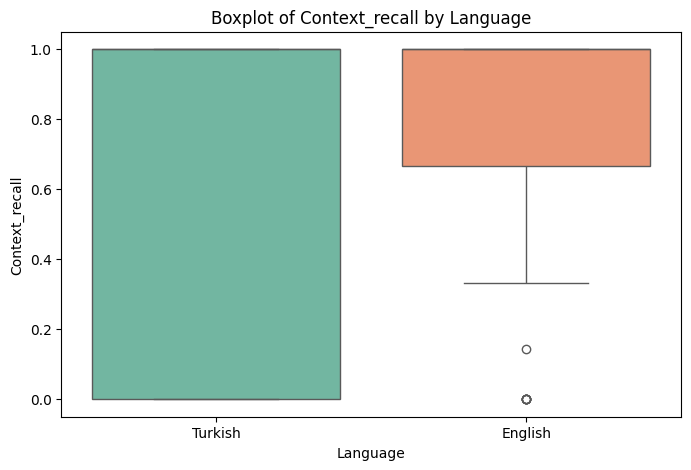

/var/folders/vj/txtyr7vn1nq48xfpxglsg4_w0000gn/T/ipykernel_63923/3212822060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Language", y=metric, palette="Set2")


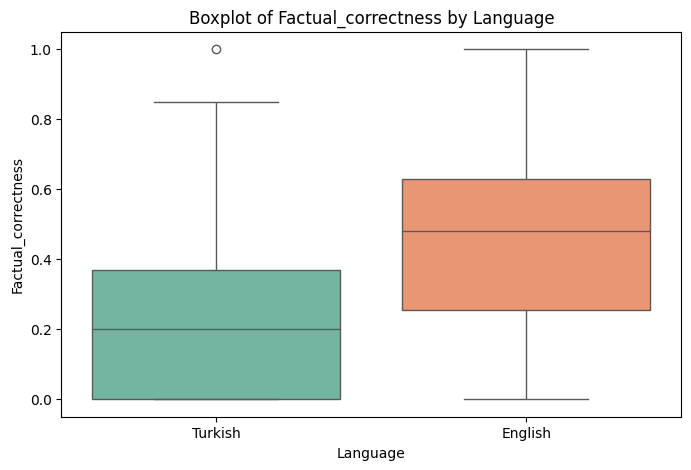

/var/folders/vj/txtyr7vn1nq48xfpxglsg4_w0000gn/T/ipykernel_63923/3212822060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Language", y=metric, palette="Set2")


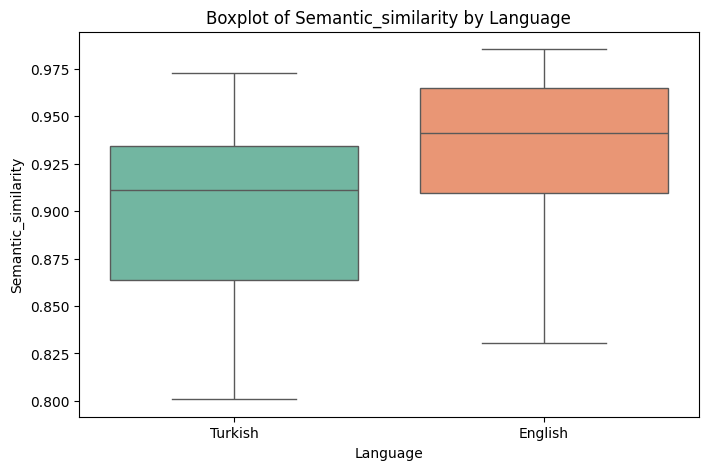

In [162]:
# Create boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Language", y=metric, palette="Set2")
    plt.title(f"Boxplot of {metric.capitalize()} by Language")
    plt.xlabel("Language")
    plt.ylabel(metric.capitalize())
    plt.show()

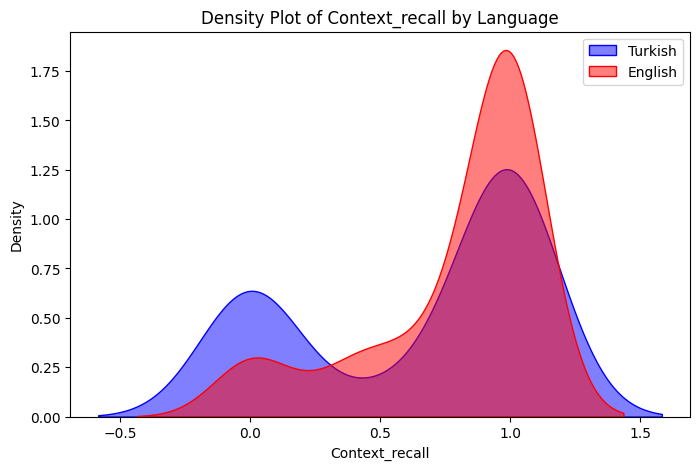

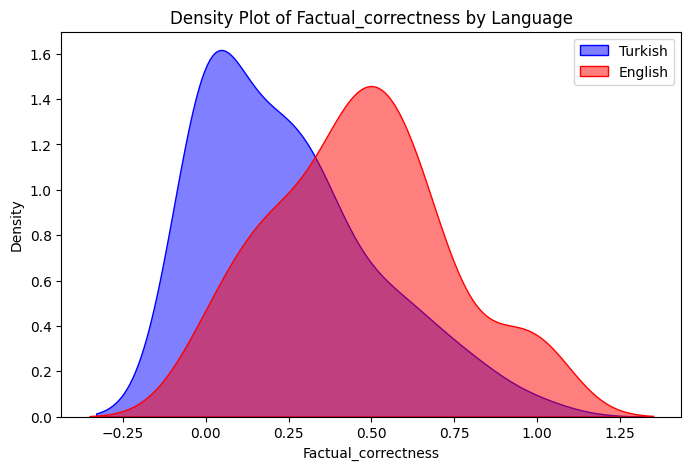

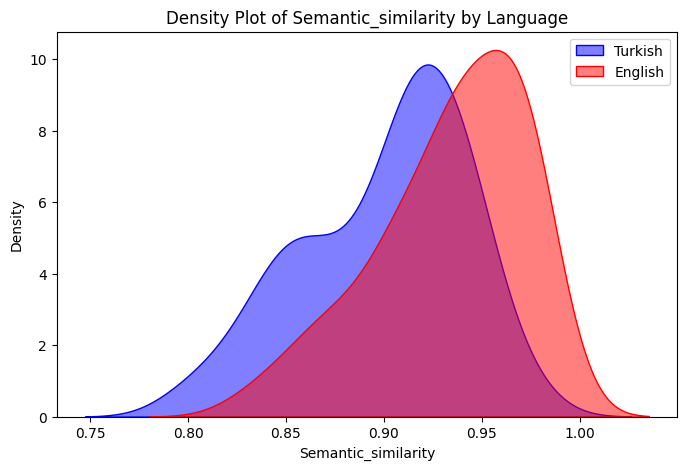

In [163]:
# Create density plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[df["Language"] == "Turkish"][metric], label="Turkish", fill=True, alpha=0.5, color="blue")
    sns.kdeplot(df[df["Language"] == "English"][metric], label="English", fill=True, alpha=0.5, color="red")
    plt.title(f"Density Plot of {metric.capitalize()} by Language")
    plt.xlabel(metric.capitalize())
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [159]:
#Wilcoxon rank-sum test
from scipy.stats import ranksums

wilcoxin_results=[]
for metric in metrics:

    turkish_data = tr_data[metric].dropna()
    english_data = eng_data[metric].dropna()

    stat, p_value = ranksums(turkish_data, english_data)
    wilcoxin_results.append({"Metric": metric,
        "Test Statistic": f"{stat:.2f}",
        "P-Value": f"{p_value:.2e}"})

results_df = pd.DataFrame(wilcoxin_results)
print(results_df)

                Metric Test Statistic   P-Value
0       context_recall          -1.14  2.54e-01
1  factual_correctness          -4.53  6.00e-06
2  semantic_similarity          -4.55  5.39e-06
